In [1]:
import requests

# URL of the file you want to download
url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'
response = requests.get(url)

# Save the file
with open('pizza_steak.zip', 'wb') as file:
    file.write(response.content)


In [2]:
import zipfile

# Extract the downloaded ZIP file
with zipfile.ZipFile('pizza_steak.zip', 'r') as zip_ref:
    zip_ref.extractall()  # You can specify a path if needed
    zip_ref.close()



In [3]:
!dir pizza_steak

 Volume in drive C is OS
 Volume Serial Number is 4288-600E

 Directory of C:\Users\Asus\Tensorflow_udemy\Computer vision\pizza_steak

05-08-2024  22:51    <DIR>          .
06-08-2024  00:05    <DIR>          ..
05-08-2024  22:51    <DIR>          test
05-08-2024  22:51    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  160,158,863,360 bytes free


In [175]:
!dir  "C:\Users\Asus\Tensorflow_udemy\Computer vision\pizza_steak\train\steak"

 Volume in drive C is OS
 Volume Serial Number is 4288-600E

 Directory of C:\Users\Asus\Tensorflow_udemy\Computer vision\pizza_steak\train\steak

05-08-2024  22:51    <DIR>          .
05-08-2024  22:51    <DIR>          ..
06-08-2024  00:33            36,185 1000205.jpg
06-08-2024  00:33            34,497 100135.jpg
06-08-2024  00:33           116,802 101312.jpg
06-08-2024  00:33            56,754 1021458.jpg
06-08-2024  00:33            34,143 1032846.jpg
06-08-2024  00:33            24,688 10380.jpg
06-08-2024  00:33            37,134 1049459.jpg
06-08-2024  00:33            49,841 1053665.jpg
06-08-2024  00:33            59,983 1068516.jpg
06-08-2024  00:33            28,996 1068975.jpg
06-08-2024  00:33            29,525 1081258.jpg
06-08-2024  00:33            49,577 1090122.jpg
06-08-2024  00:33            59,976 1093966.jpg
06-08-2024  00:33            60,253 1098844.jpg
06-08-2024  00:33            69,843 1100074.jpg
06-08-2024  00:33            45,470 1105280.jpg
06-08-2024  

In [5]:
import os
# walk through pizza_steak directory and list number of sirectory
for dirpath , dirnames,filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [6]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

In [7]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array (sorted([item.name for item in data_dir.glob("*")]))#created a list of class_names from the subdirectories
class_names = class_names[1:]
print(class_names)

['steak']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random
def view_random_image(target_dir , target_class):
  #set up the target directory we will view are images from here
  target_folder = target_dir + target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder) , 1)
  #Read the image and plot it using matplotlib
  img = mping .imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape:{img.shape}")
  return img


Image shape:(384, 512, 3)


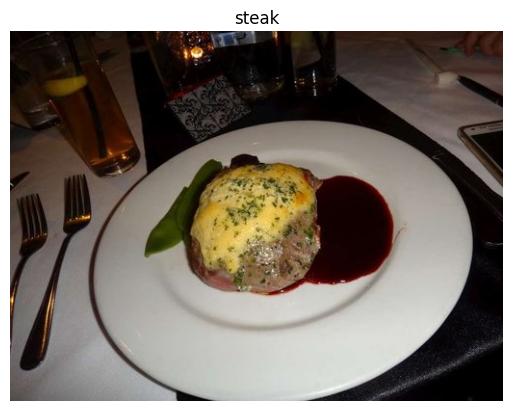

In [9]:
#view a random mage from training datset
img = view_random_image(target_dir = "pizza_steak/train/",
                  target_class = 'steak')

In [10]:
img

array([[[ 8,  0,  0],
        [10,  2,  0],
        [13,  5,  3],
        ...,
        [47, 19,  8],
        [44, 16,  5],
        [43, 15,  4]],

       [[ 8,  0,  0],
        [10,  2,  0],
        [13,  5,  3],
        ...,
        [48, 20,  9],
        [46, 18,  7],
        [45, 17,  6]],

       [[ 8,  0,  0],
        [10,  2,  0],
        [12,  4,  2],
        ...,
        [49, 19,  9],
        [48, 18,  8],
        [48, 18,  8]],

       ...,

       [[80, 76, 73],
        [80, 76, 73],
        [81, 77, 74],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[77, 73, 70],
        [77, 73, 70],
        [78, 74, 71],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[74, 70, 67],
        [75, 71, 68],
        [76, 72, 69],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [11]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 8,  0,  0],
        [10,  2,  0],
        [13,  5,  3],
        ...,
        [47, 19,  8],
        [44, 16,  5],
        [43, 15,  4]],

       [[ 8,  0,  0],
        [10,  2,  0],
        [13,  5,  3],
        ...,
        [48, 20,  9],
        [46, 18,  7],
        [45, 17,  6]],

       [[ 8,  0,  0],
        [10,  2,  0],
        [12,  4,  2],
        ...,
        [49, 19,  9],
        [48, 18,  8],
        [48, 18,  8]],

       ...,

       [[80, 76, 73],
        [80, 76, 73],
        [81, 77, 74],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[77, 73, 70],
        [77, 73, 70],
        [78, 74, 71],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[74, 70, 67],
        [75, 71, 68],
        [76, 72, 69],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)>

In [12]:
img.shape

(384, 512, 3)

In [13]:
img/255.

array([[[0.03137255, 0.        , 0.        ],
        [0.03921569, 0.00784314, 0.        ],
        [0.05098039, 0.01960784, 0.01176471],
        ...,
        [0.18431373, 0.0745098 , 0.03137255],
        [0.17254902, 0.0627451 , 0.01960784],
        [0.16862745, 0.05882353, 0.01568627]],

       [[0.03137255, 0.        , 0.        ],
        [0.03921569, 0.00784314, 0.        ],
        [0.05098039, 0.01960784, 0.01176471],
        ...,
        [0.18823529, 0.07843137, 0.03529412],
        [0.18039216, 0.07058824, 0.02745098],
        [0.17647059, 0.06666667, 0.02352941]],

       [[0.03137255, 0.        , 0.        ],
        [0.03921569, 0.00784314, 0.        ],
        [0.04705882, 0.01568627, 0.00784314],
        ...,
        [0.19215686, 0.0745098 , 0.03529412],
        [0.18823529, 0.07058824, 0.03137255],
        [0.18823529, 0.07058824, 0.03137255]],

       ...,

       [[0.31372549, 0.29803922, 0.28627451],
        [0.31372549, 0.29803922, 0.28627451],
        [0.31764706, 0

In [19]:
# An end to end example
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

#Preprocessing
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)
#setup paths to our data directories
train_dir = "C:\\Users\\Asus\\Tensorflow_udemy\\Computer vision\\pizza_steak\\train"
test_dir = "C:\\Users\\Asus\\Tensorflow_udemy\\Computer vision\\pizza_steak\\test"
 #Import data from directories and turn it into batches
train_data  = train_datagen.flow_from_directory(directory = train_dir,
                                                batch_size = 32,
                                                target_size = (224,224),
                                                class_mode = "binary",
                                                seed = 42)
valid_data = valid_datagen.flow_from_directory(directory =test_dir,
                                               batch_size = 32,
                                               target_size =(224,224),
                                               class_mode = 'binary',
                                               seed = 42)
#Build a CNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
model = Sequential()
model.add(Conv2D(filters = 10,#otal no of the kernal in this layers
                 kernel_size = 3,#(filter of kernal 3x3)
                 activation= 'relu',
                 input_shape = (224,224,3))),#(height,weight,color_channels)
model.add(Conv2D(10,3,activation = 'relu')),
#model.add(MaxPooling2D(pool_size = 2,#(It reduces the dimension of the given shape by pooling)
                    #padding = 'valid')),
model.add(Conv2D(10,3,activation = 'relu'))
model.add(Conv2D(10,3,activation = 'relu'))
#model.add(MaxPooling2D(2,)),
model.add(Flatten())
model.add(Dense(1,activation = "sigmoid"))

#compiling our model
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

history = model.fit(train_data,
                  epochs = 5,
                  #steps_per_epoch = len(train_data),
                  validation_data = valid_data,

                  )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


C:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


C:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5422 - loss: 1.1388 - val_accuracy: 0.6440 - val_loss: 0.6445
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.6021 - loss: 0.6479 - val_accuracy: 0.6980 - val_loss: 0.6314
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.6986 - loss: 0.5705 - val_accuracy: 0.7580 - val_loss: 0.4792
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7968 - loss: 0.4368 - val_accuracy: 0.8120 - val_loss: 0.4472
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8874 - loss: 0.2967 - val_accuracy: 0.7720 - val_loss: 0.4966


<Axes: >

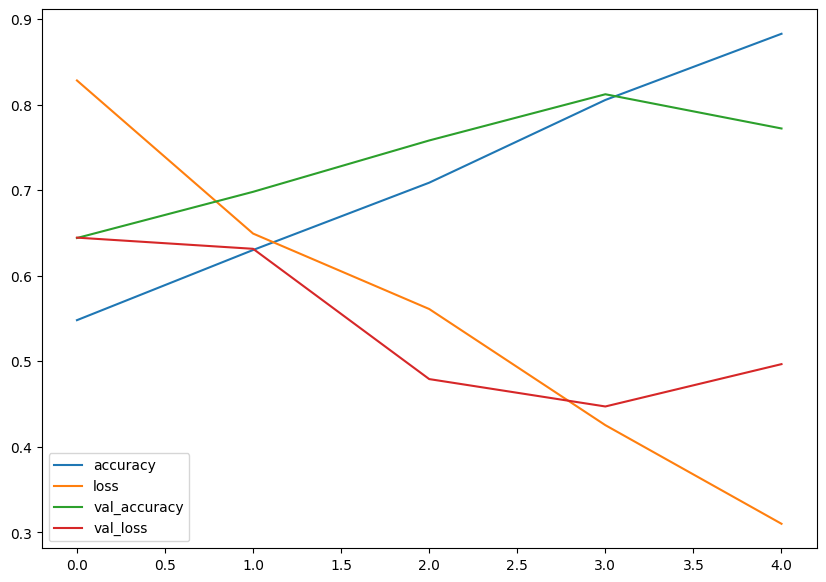

In [20]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10,7))

In [39]:
# improving the above model
model1 = Sequential()
model1.add(Conv2D(filters = 10,#otal no of the kernal in this layers
                 kernel_size = 3,#(filter of kernal 3x3)
                 activation= 'relu',
                 input_shape = (224,224,3))),#(height,weight,color_channels)
model1.add(Conv2D(10,3,activation = 'relu')),
model1.add(MaxPooling2D(pool_size = 2,#(It reduces the dimension of the given shape by pooling)
                    padding = 'valid')),
model1.add(Conv2D(10,3,activation = 'relu'))
model1.add(Conv2D(10,3,activation = 'relu'))
model1.add(MaxPooling2D(2,)),
model1.add(Flatten())
model1.add(Dense(1,activation = "sigmoid"))

#compiling our model
model1.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

history1 = model.fit(train_data,
                  epochs = 5,
                  #steps_per_epoch = len(train_data),
                  validation_data = valid_data,

                  )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 654ms/step - accuracy: 0.8403 - loss: 0.3725 - val_accuracy: 0.8520 - val_loss: 0.3075
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 34s 712ms/step - accuracy: 0.8750 - loss: 0.3153 - val_accuracy: 0.8580 - val_loss: 0.3247
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 34s 705ms/step - accuracy: 0.8869 - loss: 0.2789 - val_accuracy: 0.8560 - val_loss: 0.3416
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 34s 699ms/step - accuracy: 0.8894 - loss: 0.2867 - val_accuracy: 0.8320 - val_loss: 0.3740
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 656ms/step - accuracy: 0.9190 - loss: 0.2389 - val_accuracy: 0.8560 - val_loss: 0.3501


In [105]:
import matplotlib.pyplot as plt
def plotting(history):

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(history.history['loss']))
    
    #For loss 
    plt.plot(epochs,loss,label = 'training_loss')
    plt.plot(epochs,val_loss,label = 'val_loss')
    plt.title('Loss')
    plt.xlabel('epochs')
    plt.legend()

    #for accuracy
    plt.figure()
    plt.plot(epochs,accuracy,label = 'training_accuracy')
    plt.plot(epochs,val_loss,label = 'val_loss')
    plt.xlabel('epochs')
    plt.legend()
    
    



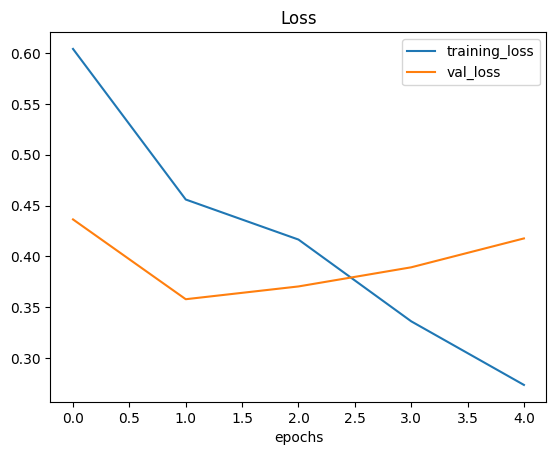

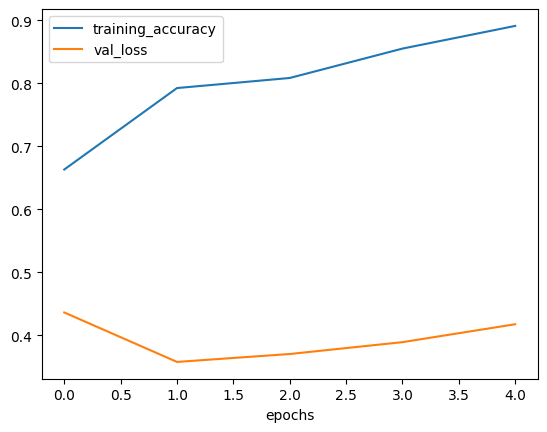

In [106]:
plotting(history)

In [107]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [43]:
model1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,101 (121.49 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

<h2>Trying to increase the accuracy by *DATA AUGMENTATION* </h2>

In [74]:
# Augmentation is usually performed on training dataset

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                            rotation_range = 0.2,
                                            shear_range=0.2,
                                            zoom_range = 0.2,
                                            width_shift_range=0.2,
                                            height_shift_range = 0.3,
                                            horizontal_flip=True)

#Create ImagedataGenerator without data_augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

#Create ImageDatagenerato without data_augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)


In [75]:
#import data and augmented it from training directory
print('Augmented training data')
training_data_augmented = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                     target_size =(224,224),
                                                                     batch_size =32,
                                                                     class_mode = 'binary',
                                                                     shuffle = False, 
                                                                     )
print("Non - Augmented Training Data:")
training_data = train_datagen.flow_from_directory(directory = train_dir,
                                                                     target_size =(224,224),
                                                                     batch_size =32,
                                                                     class_mode = 'binary',
                                                                     shuffle = False, 
                                                                     )
print("Non AUgmented testing Data:")
testing_data = valid_datagen.flow_from_directory(directory = test_dir,
                                                batch_size = 32,
                                                shuffle = False,
                                                class_mode = 'binary')

Augmented training data
Found 1500 images belonging to 2 classes.
Non - Augmented Training Data:
Found 1500 images belonging to 2 classes.
Non AUgmented testing Data:
Found 500 images belonging to 2 classes.


In [76]:
# visualising our augmented datastes
images , labels = next(training_data)
aug_images , aug_labels = next(training_data_augmented)

showing image number:7


(-0.5, 223.5, 223.5, -0.5)

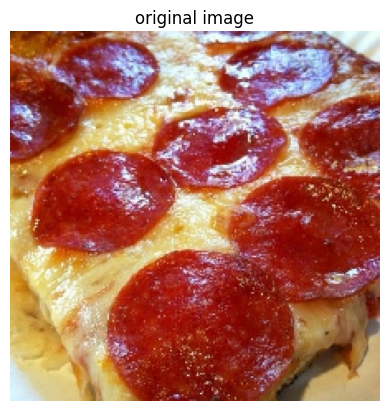

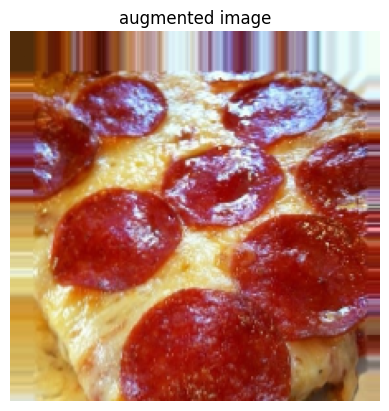

In [78]:
import random
random_number = random.randint(0,31)# our batch size is 32
print(f"showing image number:{random_number}")
plt.imshow(images[random_number])
plt.title(f"original image")
plt.axis(False)
plt.figure()


plt.imshow(aug_images[random_number])
plt.title(f"augmented image")
plt.axis(False)


In [102]:
## BUILDING MODEL 

model2 = Sequential()
model2.add(Conv2D(filters = 10,#otal no of the kernal in this layers
                 kernel_size = 3,#(filter of kernal 3x3)
                 activation= 'relu',
                 input_shape = (224,224,3))),#(height,weight,color_channels)
model2.add(Conv2D(10,3,activation = 'relu')),
model2.add(MaxPooling2D(pool_size = 2,#(It reduces the dimension of the given shape by pooling)
                    padding = 'valid')),
model2.add(Conv2D(10,3,activation = 'relu'))
model2.add(Conv2D(10,3,activation = 'relu'))
model2.add(MaxPooling2D(2,)),
model2.add(Flatten())
model2.add(Dense(1,activation = "sigmoid"))

#compiling our model
model2.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

history2 = model.fit(train_data,
                  epochs = 5,
                  #steps_per_epoch = len(train_data),
                  validation_data = valid_data,

                  )

C:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 671ms/step - accuracy: 0.9280 - loss: 0.1917 - val_accuracy: 0.8280 - val_loss: 0.4102
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 682ms/step - accuracy: 0.9420 - loss: 0.1734 - val_accuracy: 0.8520 - val_loss: 0.3603
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 680ms/step - accuracy: 0.9579 - loss: 0.1420 - val_accuracy: 0.8400 - val_loss: 0.4750
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 669ms/step - accuracy: 0.9661 - loss: 0.1089 - val_accuracy: 0.8240 - val_loss: 0.4901
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 665ms/step - accuracy: 0.9885 - loss: 0.0528 - val_accuracy: 0.8220 - val_loss: 0.5654


<Axes: >

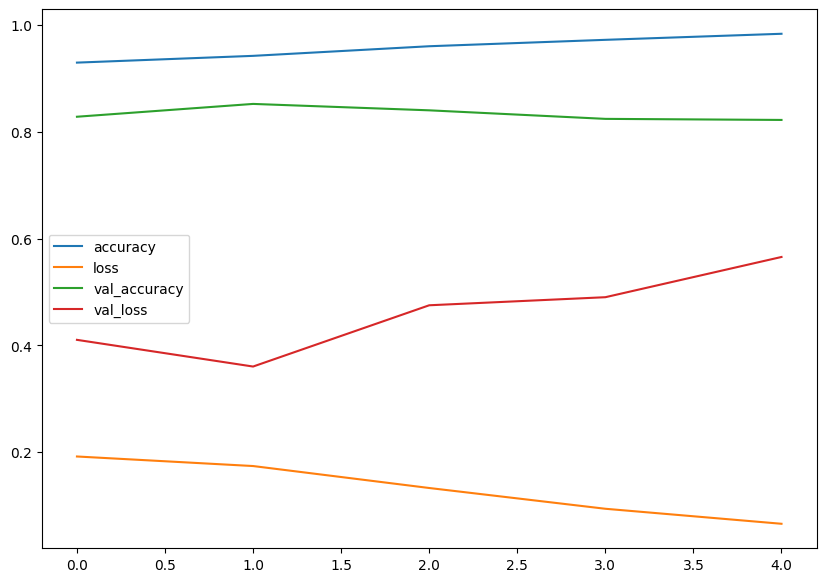

In [103]:
pd.DataFrame(history2.history).plot(figsize = (10,7))

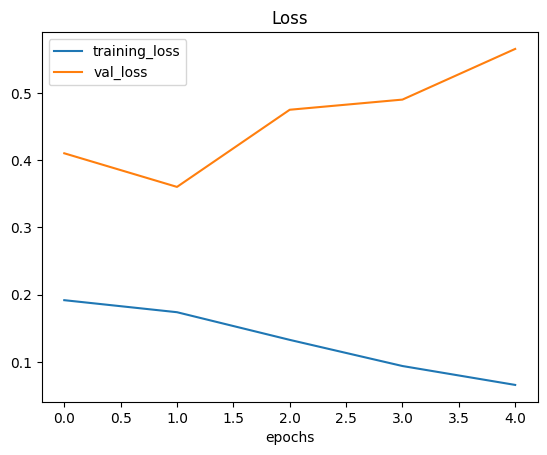

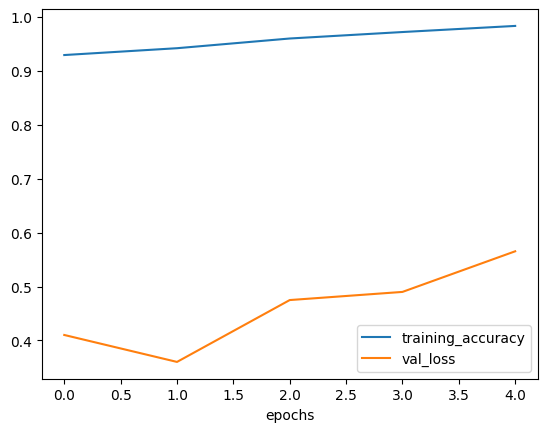

In [108]:
plotting(history2)

<h2>Maing predictions ion our trained model</h2>

In [126]:
print(class_names)

['steak']


(-0.5, 3023.5, 4031.5, -0.5)

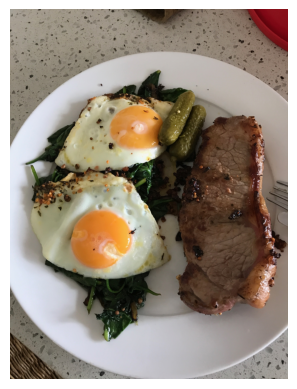

In [138]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import requests
'''
# URL of the file you want to download
url = 'https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg'
response = requests.get(url)

# Save the file
with open('pizza_steak.zip', 'wb') as file:
    file.write(response.content)
'''
steak = mpimg.imread("C:\\Users\\Asus\\Tensorflow_udemy\\Computer vision\\03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [139]:
steak.shape

(4032, 3024, 3)

In [140]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

In [145]:
expanded_steak=tf.expand_dims(steak,axis=0).shape

In [158]:
def load_and_prep_image(filename,img_shape=224):
    img = tf.io.read_file(filename)
    #Decode the read file into tensor
    img = tf.image.decode_image(img)
    # REsize the image
    img = tf.image.resize(img , size =[img_shape,img_shape])
    img= img/255.
    return img
    '''
    read an image form filname,turns it into a tensor and reshape it to (img_shape,img_shape,color-channels)
    '''
    
    
    

In [159]:
steak = load_and_prep_image("C:\\Users\\Asus\\Tensorflow_udemy\\Computer vision\\03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [161]:
expanded_steak = tf.expand_dims(steak,axis = 0)

In [170]:
pred = model2.predict(tf.expand_dims(steak,axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.48653147]], dtype=float32)

In [173]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'